In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

dataset_name = "music4all"
dataset_relative_location = "../../../dataset"

dataset_path = Path(dataset_relative_location) / dataset_name

datasets = {}

csvsPattern = "*.csv"
csvs = list(dataset_path.glob(csvsPattern))
csvs

for csv in csvs:
    datasets[csv.stem] = pd.read_csv(csv, delimiter="\t")

# Taking a look at the datasets we have
datasets.keys()

dict_keys(['id_tags', 'id_metadata', 'id_information', 'listening_history', 'id_lang', 'id_genres'])

In [4]:
sns.set_theme()

In [5]:
df_with_disruption = pd.read_csv(Path("../dataset") / "output" / "csv_with_disruption" / "song_info_with_disruption_26119_feat_transfer_learning_gamma_0.1.csv")
df_with_disruption = df_with_disruption.drop(columns=["Unnamed: 0", "index", "mapping_to_fv_index"])

In [6]:
df_with_disruption.describe()

,ni,nj,nk,disruption,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
count,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,2.611900e+04
mean,3.795666,167.041464,38189.660975,0.054093,35.351966,2005.311880,0.519062,0.686320,5.302538,0.628010,0.457562,123.115832,2.412177e+05
std,21.446767,281.718079,58554.187755,0.238661,14.748871,13.411129,0.168388,0.229778,3.568541,0.483345,0.247675,28.869761,8.966216e+04
min,0.000000,0.000000,0.000000,-1.000000,0.000000,1928.000000,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,1.777300e+04
25%,0.000000,9.000000,1523.000000,-0.007452,25.000000,2000.000000,0.404000,0.531000,2.000000,0.000000,0.253000,100.833000,1.947360e+05
50%,0.000000,53.000000,11482.000000,-0.003350,35.000000,2010.000000,0.525000,0.730000,5.000000,1.000000,0.439000,121.190000,2.270670e+05
75%,1.000000,197.000000,48190.000000,-0.001672,45.000000,2015.000000,0.640000,0.879000,9.000000,1.000000,0.649000,140.408000,2.698060e+05
max,817.000000,3475.000000,386705.000000,1.000000,90.000000,2019.000000,0.980000,1.000000,11.000000,1.000000,0.998000,221.947000,3.964682e+06


## Artistas Mais Disruptivos até 2019 - Amostragem de 26119 (de 30000)

Para analisar os artistas mais disruptivos primeiro temos que levar em conta alguns fatores importantes.


Alguns artistas vão estar mais bem representados que outros, já que é um base de dados feita a partir do spotify.

Ou seja, somente somar os valores das disrupções vai favorecer muito artistas mais predominantes. 


Por isso seria interessante normalizar esses valores para estarem relacionados a predominância dos mesmos no conjunto de dados, 

por isso a soma da disrupção é dividida pela número de músicas de um artista. 


Um álbum é considerado um album se possui 6 ou mais músicas, olhando para o conjunto de dados, 

a quantidade média de músicas de cada artista fica um pouco maior que este número 6.5. 

Logo selecionaremos os artistas que tem pelo menos um album no conjunto de dados e tiraremos a média da disrupção pelo seu número de músicas.


In [7]:
df_with_disruption.groupby(['artist'])["song"].count().mean()

3.2265596046942555

## Artistas Mais Disruptivos (Utilizando a média)

In [31]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 3").sort_values(by=['mean'], ascending=False)[:15]

,sum,count,mean
artist,,,
Jon Hopkins,2.500000,3,0.833333
Empyrium,3.992865,5,0.798573
Sarah Vaughan,2.285714,3,0.761905
Miles Davis,5.264804,7,0.752115
Laurel Halo,3.000000,4,0.750000
Louis Armstrong,2.997280,4,0.749320
Frank Sinatra,9.428637,13,0.725280
Tortoise,4.083903,6,0.680650
Wilkinson,2.035714,3,0.678571


Text(0.5, 1.0, 'Artistas mais disruptivos até 2002')

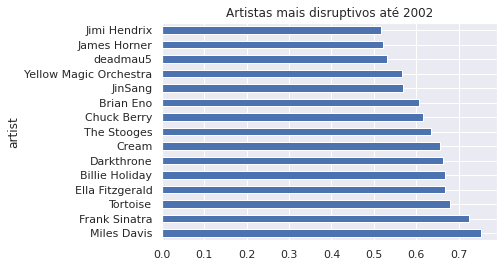

In [32]:
df_with_disruption.groupby(['artist'])['disruption'] \
    .agg(['sum', 'count', 'mean']).query("count >= 6") \
    .sort_values(by=['mean'], ascending=False)["mean"][:15].plot.barh() \
    .set_title("Artistas mais disruptivos até 2002")


# Quem foram esses artistas ?

Miles Davis
- Considerado um dos mais influentes músicos do século XX, Davis esteve na vanguarda de quase todos os desenvolvimentos do jazz desde a Segunda Guerra Mundial até a década de 1990. Ele participou de várias gravações do bebop e das primeiras gravações do cool jazz. Foi parte do desenvolvimento do jazz modal, e também do jazz fusion que originou-se do trabalho dele com outros músicos no final da década de 1960 e no começo da década de 1970.

The Stooges
- The Stooges (também conhecido como Iggy and The Stooges) foi uma banda de proto-punk norte-americana formada no final dos anos 60.

Chuck Berry 
- Foi um cantor e compositor estadunidense, um dos pioneiros do gênero rock and roll.

Tortoise
- An American post-rock band formed in Chicago, Illinois in 1990.[1] The band incorporates krautrock, dub, minimal music, electronica and jazz into their music, a combination sometimes termed "post-rock". Tortoise have been consistently credited for the rise of the post-rock movement in the 1990s

Darkthrone 
- É um grupo musical da Noruega formado em 1986, inicialmente chamado de Black Death.[1][2] Em 1991, a banda aderiu ao estilo black metal influenciado por Bathory e Celtic Frost, e veio a ser umas das bandas líderes do movimento do black metal norueguês

James Roy Horner
- Foi um músico estadunidense, dedicado principalmente a compor trilhas sonoras de filmes.
Conhecido pela integração entre elementos de corais e eletrônicos em muitas de suas trilha sonoras, e pelo uso frequente de elementos musicais celtas. Seu trabalho para o filme Titanic, de 1997, contribuiu para que o álbum de trilha sonora do filme esteja entre os mais vendidos de todos os tempos

## Artistas Mais Disruptivos (utilizando a soma da disrupção)

Utilizando apenas a soma sem levar em conta o número de músicas que um artista tem, temos vários artistas que tiveram grandes músicas disruptivas em suas carreiras.

Porém a soma da disrupção acaba ficando inflacionada pelo número de músicas que o mesmo no conjunto de dados

In [29]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).sort_values(by=['sum'], ascending=False)[:15]

,sum,count,mean
artist,,,
Pink Floyd,12.506460,44,0.284238
Bob Dylan,12.131466,43,0.282127
The Beatles,11.538598,50,0.230772
Nine Inch Nails,10.785303,28,0.385189
Queen,10.236421,67,0.152782
Billie Holiday,10.012744,15,0.667516
Elvis Presley,9.895473,20,0.494774
Frank Sinatra,9.428637,13,0.725280
Björk,8.882425,25,0.355297


Text(0.5, 1.0, 'Artistas mais disruptivos até 2002 - Utilizando a Soma')

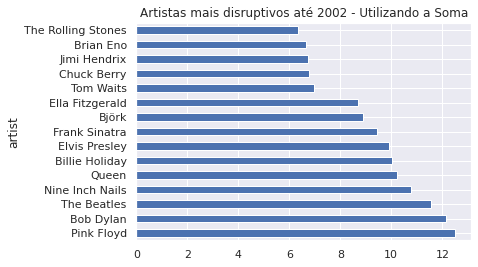

In [30]:
df_with_disruption.groupby(['artist'])['disruption'] \
    .agg(['sum', 'count', 'mean']).query("count >= 6") \
    .sort_values(by=['sum'], ascending=False)["sum"][:15].plot.barh() \
    .set_title("Artistas mais disruptivos até 2002 - Utilizando a Soma")

## Artistas mais consolidadores (utilizando a média)

In [19]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['mean'], ascending=False)[-15:]

,sum,count,mean
artist,,,
The Clash,-0.250319,11,-0.022756
Obituary,-0.183159,8,-0.022895
Cascada,-0.145834,6,-0.024306
The Runaways,-0.250196,10,-0.025020
Anthrax,-0.203526,8,-0.025441
Suffocation,-0.210631,8,-0.026329
Kreator,-0.159312,6,-0.026552
The Psychedelic Furs,-0.197220,7,-0.028174
Wicca Phase Springs Eternal,-0.182509,6,-0.030418


Text(0.5, 1.0, 'Artistas mais consolidadores até 2002 - Utilizando a Média')

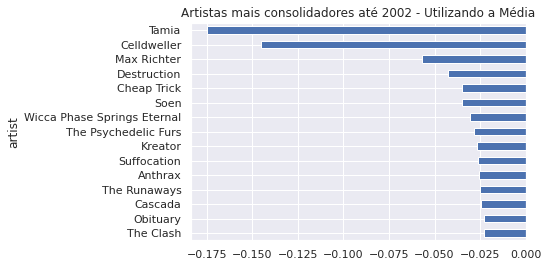

In [20]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['mean'], ascending=False)["mean"][-15:].plot.barh().set_title("Artistas mais consolidadores até 2002 - Utilizando a Média")

Artistas de um estilo músical inovador (como no caso do rock cômico dos mamonas assassinas) nas letras ou na mistura de gêneros bem estabelecidos não são identificados como artistas disruptivos por este modelo.

## Artistas mais consolidadores (utilizando a soma)

In [21]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['sum'], ascending=False)[-15:]

,sum,count,mean
artist,,,
The Cure,-0.251683,34,-0.007402
Destruction,-0.254492,6,-0.042415
Nick Cave & The Bad Seeds,-0.261072,31,-0.008422
Brandy,-0.269804,19,-0.014200
Deep Purple,-0.276240,14,-0.019731
Legião Urbana,-0.276629,21,-0.013173
Cher,-0.311508,30,-0.010384
Testament,-0.340226,15,-0.022682
Megadeth,-0.362021,36,-0.010056


Text(0.5, 1.0, 'Artistas mais consolidadores até 2002 - Utilizando a Soma')

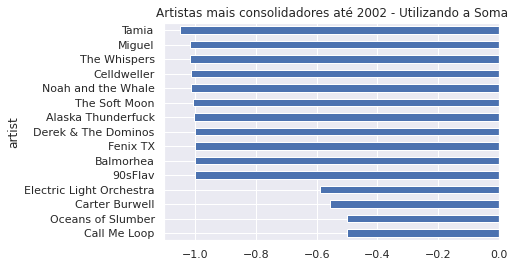

In [33]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).sort_values(by=['sum'], ascending=False)["sum"][-15:].plot.barh().set_title("Artistas mais consolidadores até 2002 - Utilizando a Soma")

## Músicas mais disruptivas

In [34]:
df_with_disruption.sort_values(["disruption", "ni"], ascending=False)[["artist", "song", "disruption", "ni", "nj", "nk", "popularity", "release"]][:15]

,artist,song,disruption,ni,nj,nk,popularity,release
243,The Beatles,Think For Yourself - Remastered 2009,1.0,463.0,0.0,0.0,49.0,1965
99,Eddie Cochran,Somethin' Else,1.0,425.0,0.0,0.0,40.0,1960
43,Chuck Berry,Together (We'll Always Be),1.0,348.0,0.0,0.0,10.0,1957
321,Marvin Gaye,It Takes Two,1.0,290.0,0.0,0.0,63.0,1966
1592,The Boys,I Don't Care,1.0,278.0,0.0,0.0,13.0,1977
2012,Thin Lizzy,Killer on the Loose,1.0,265.0,0.0,0.0,22.0,1980
1408,Thin Lizzy,Johnny,1.0,245.0,0.0,0.0,34.0,1976
867,Pink Floyd,The Gold It's in the...,1.0,226.0,0.0,0.0,37.0,1972
1113,Brian Eno,Baby's on Fire,1.0,218.0,0.0,0.0,38.0,1973
185,Dusty Springfield,Wishin' And Hopin',1.0,217.0,0.0,0.0,45.0,1964


## Correlação entre disrupção e outros atributos

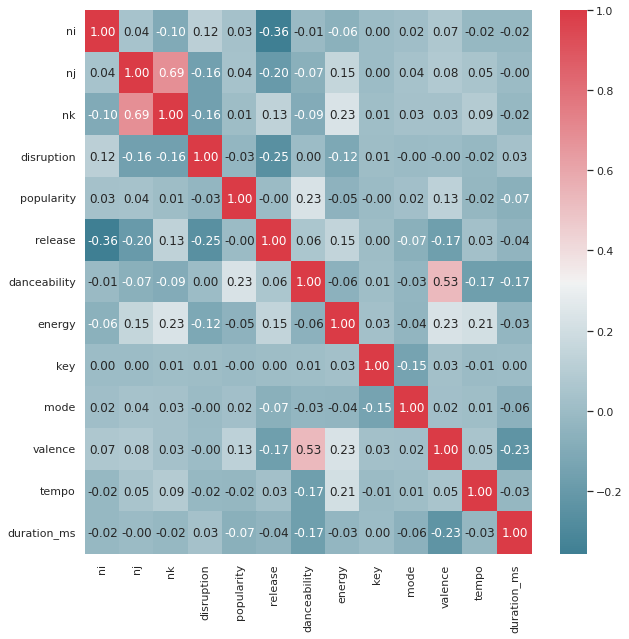

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)

   # show plot
   plt.show()


heatMap(df_with_disruption, True)

Podemos ver uma correlação negativa quase moderada (-0.25) entre a disrupção e o ano, ou seja, músicas precursoras/antigas em seus respectivos estilos foram mais disruptivas.

Assim como a correlação negativa fraca com o $n_{j}$ e o $n_{k}$ faz sentido, já que ambos estão no denominador no cálculo da disrupção.

Há também interessantemente uma correlação fraca negativa em relação à energia da música. A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. 

Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto o prelúdio de Bach tem pontuação baixa nessa escala. 
As características perceptivas que contribuem para este atributo incluem gama dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

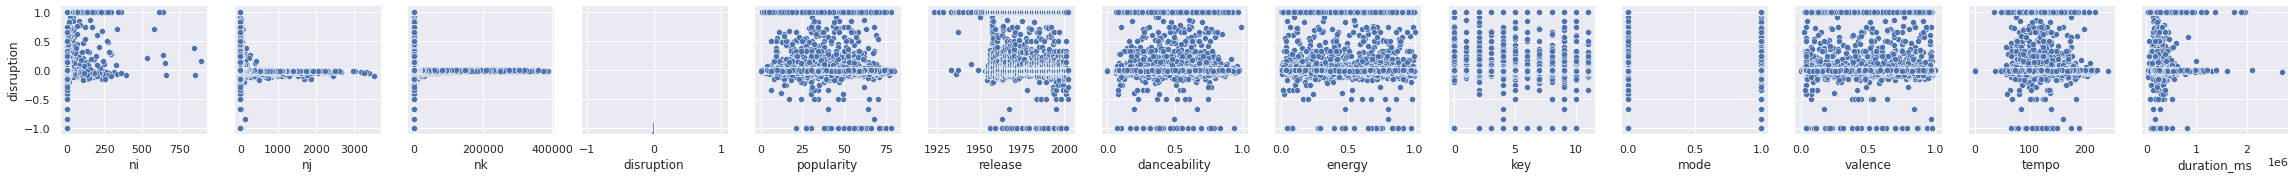

In [95]:
# Basic correlogram
sns.pairplot(df_with_disruption, y_vars=["disruption"])

# Correlação entre disrupção e gêneros musicais

Transformando lista de gêneros em colunas e binarizando os dados ( se possui o gênero será 1, caso contrário 0)

In [25]:
fewer_columns = df_with_disruption[["id", "artist", "song", "release", "disruption"]]
genres_as_columns = df_with_disruption['genres'].str.get_dummies(sep=',')
final = pd.concat([fewer_columns, genres_as_columns], axis=1)
final.head()

,id,artist,song,release,disruption,8-bit,a cappella,abstract,abstract hip hop,accordion,...,wave,west coast rap,witch house,wonky,world,worship,yacht rock,yoga,zeuhl,zouk
0,3MEb9LZbB80nQ1a8,Louis Armstrong,St. James Infirmary,1928,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1Z7Pb158yANCZ7zN,Billie Holiday,Georgia On My Mind,1933,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8rCzU7kVpoJ0Z37D,Billie Holiday,A Fine Romance,1933,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AHJbjIlp98gVY3Pj,Billie Holiday,Gloomy Sunday,1933,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1EhoPstBUguE4Btf,Fred Astaire,The Way You Look Tonight,1935,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Usando a correlação de Pearson para descobrir se há uma correlação entre gênero e disrupção

In [26]:
genres_correlation_matrix = final.corr()
disruption_genres_pearson_corr = genres_correlation_matrix["disruption"].sort_values()
disruption_genres_pearson_corr = disruption_genres_pearson_corr[:] # -1 Removes the correlation with itself


### Gêneros mais consolidadores

<AxesSubplot:>

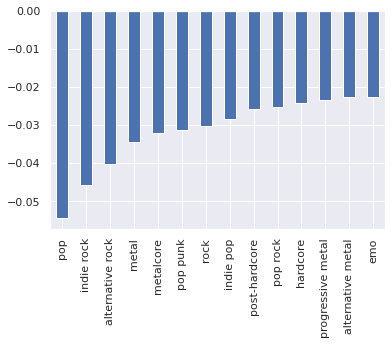

In [37]:
consolidating_genres = disruption_genres_pearson_corr[1:15] # 1: removing release column
consolidating_genres.plot.bar()

### Gêneros mais disruptivos

<AxesSubplot:>

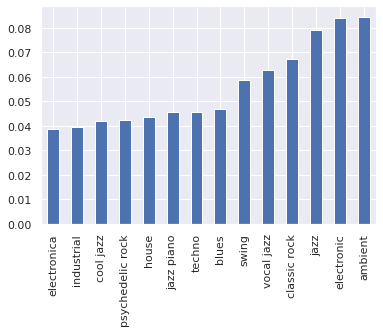

In [36]:
disruptive_genres    = disruption_genres_pearson_corr[-15:-1] # -1 remove disruption correlation with itself
disruptive_genres.plot.bar()

## Há gêneros que possuem uma correlação maior ou menor (apesar de serem todas pequenas ou pouco significantes). 
Sendo interessante a maior correlação ser uma correlação fraca de 0.12 com o jazz, o que faz sentido, já que é um gênero musical que se reinventou ao longo dos anos

In [48]:
def num_of_genres(df):
    genres = ",".join(df['genres']).split(",")
    # That way we can count the occurrences of all genres in the dataframe
    genres_series = pd.Series(genres)
    unique_ones = genres_series.unique()
    rock = sum('rock' in s for s in unique_ones)
    pop = sum('pop' in s for s in unique_ones)
    jazz = sum('jazz' in s for s in unique_ones)
    print(f"Number of Rock Pop Jazz related Tags {rock, pop, jazz}")
    print(f"Number of unique genres in the dataset: {genres_series.nunique()}")

num_of_genres(df_with_disruption)
num_of_genres(datasets["id_genres"][:30000])
num_of_genres(datasets["id_genres"])

Number of Rock Pop Jazz related Tags (54, 43, 22)
Number of unique genres in the dataset: 460
Number of Rock Pop Jazz related Tags (67, 68, 23)
Number of unique genres in the dataset: 665
Number of Rock Pop Jazz related Tags (75, 79, 30)
Number of unique genres in the dataset: 853


In [ ]:
listening_history = datasets["listening_history"].copy(deep=True)
listening_history.head()

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09


In [ ]:
listening_history.describe()

,user,song,timestamp
count,5109592,5109592,5109592
unique,14127,99596,122340
top,user_Vrd41io2,32m5suoC94ytD8Ed,2019-02-08 20:35
freq,500,82871,175


In [56]:
all_users_history = listening_history.copy(deep=True)
all_users_history["timestamp"] = pd.to_datetime(all_users_history["timestamp"])

In [48]:
user_history = listening_history.query("user == 'user_007XIjOr'").sort_values(by=["timestamp"])

In [49]:
user_history["timestamp"] = pd.to_datetime(user_history["timestamp"])

In [50]:
user_history["time_diff"] = user_history["timestamp"].diff().dt.seconds.div(60, fill_value=0)

In [51]:
print(user_history.to_string())

              user              song           timestamp  time_diff
0    user_007XIjOr  DaTQ53TUmfP93FSr 2019-02-20 12:28:00        0.0
1    user_007XIjOr  dGeyvi5WCOjDU7da 2019-02-20 12:35:00        7.0
2    user_007XIjOr  qUm54NYOjeFhmKYx 2019-02-20 12:48:00       13.0
3    user_007XIjOr  FtnuMT1DlevSR2n5 2019-02-20 12:52:00        4.0
4    user_007XIjOr  LHETTZcSZLeaVOGh 2019-02-20 13:09:00       17.0
5    user_007XIjOr  LHETTZcSZLeaVOGh 2019-02-20 13:13:00        4.0
6    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:33:00       20.0
7    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:39:00        6.0
8    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:45:00        6.0
9    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:51:00        6.0
10   user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:58:00        7.0
11   user_007XIjOr  QDtAFWCvEaRwFPnC 2019-02-20 14:15:00       17.0
12   user_007XIjOr  MFVaxfkxZAUc4C8U 2019-02-20 14:20:00        5.0
13   user_007XIjOr  DhLocRBlCrB5ikDO 2019-02-20 

In [62]:
def get_cdf(df, field='time_diff'):
    res = {}
    for quantile in np.arange(0.0, 1,0.0005):
        res[quantile] = df[field].quantile(quantile)
    res_series = pd.DataFrame(pd.Series(res)).reset_index().set_index(0)
    return res_series

## Entendendo quanto tempo é uma sessão do usuário

<AxesSubplot:xlabel='0'>

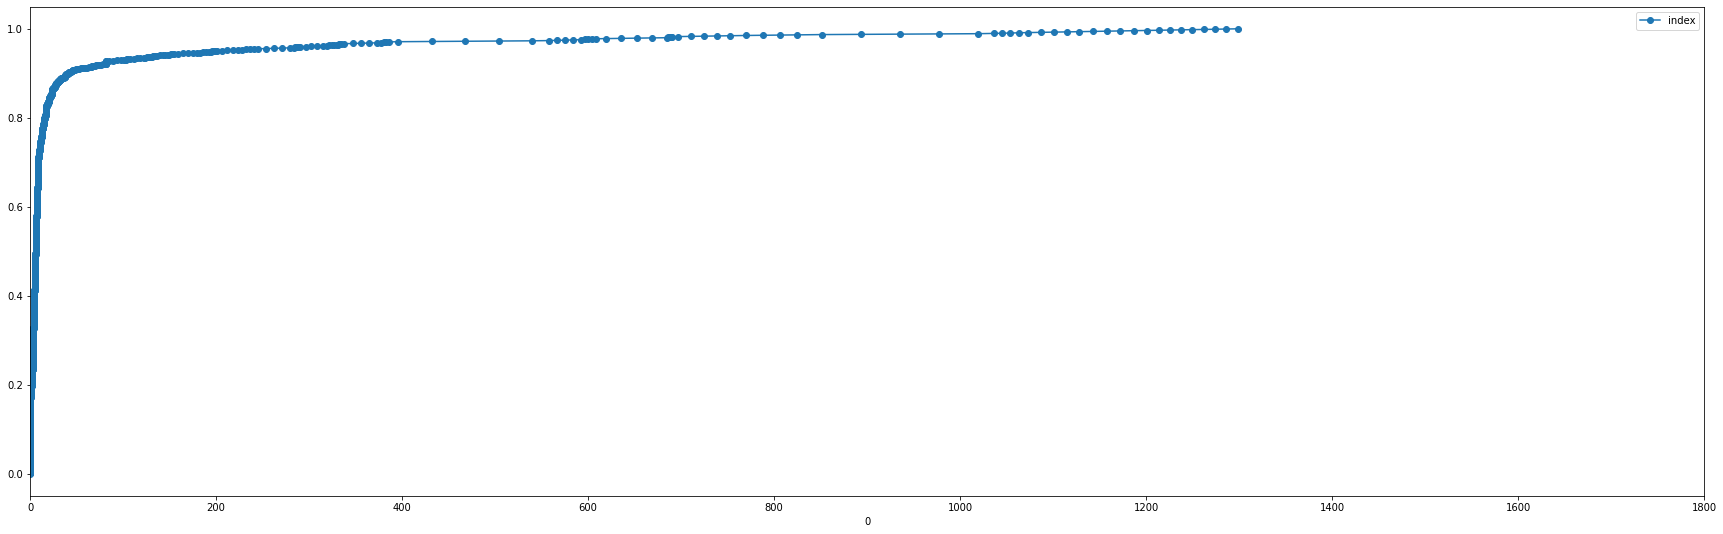

In [53]:
time_diff.plot(marker='o', figsize=(30,9), xlim=(0,1800))

In [57]:
sorted_user_history = all_users_history.sort_values(by=["user", "timestamp"])
sorted_user_history["new_user"] = sorted_user_history.user != sorted_user_history.user.shift()
sorted_user_history["time_diff"] = sorted_user_history["timestamp"].diff().dt.seconds.div(60, fill_value=0)
sorted_user_history.loc[sorted_user_history.new_user] = None

In [60]:
sorted_user_history.dropna()

,user,song,timestamp,new_user,time_diff
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35:00,0.0,7.0
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48:00,0.0,13.0
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52:00,0.0,4.0
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09:00,0.0,17.0
5,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:13:00,0.0,4.0
...,...,...,...,...,...
5109587,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 15:57:00,0.0,9.0
5109588,user_zzWscYTy,5ZHgff3sjETIiedr,2019-01-10 16:21:00,0.0,24.0
5109589,user_zzWscYTy,m4O1iLh6fC43xjRy,2019-01-10 16:48:00,0.0,27.0
5109590,user_zzWscYTy,mvUaP8k67qOFfA65,2019-01-10 21:13:00,0.0,265.0


In [63]:
time_diff_all_users = get_cdf(sorted_user_history)

<AxesSubplot:xlabel='0'>

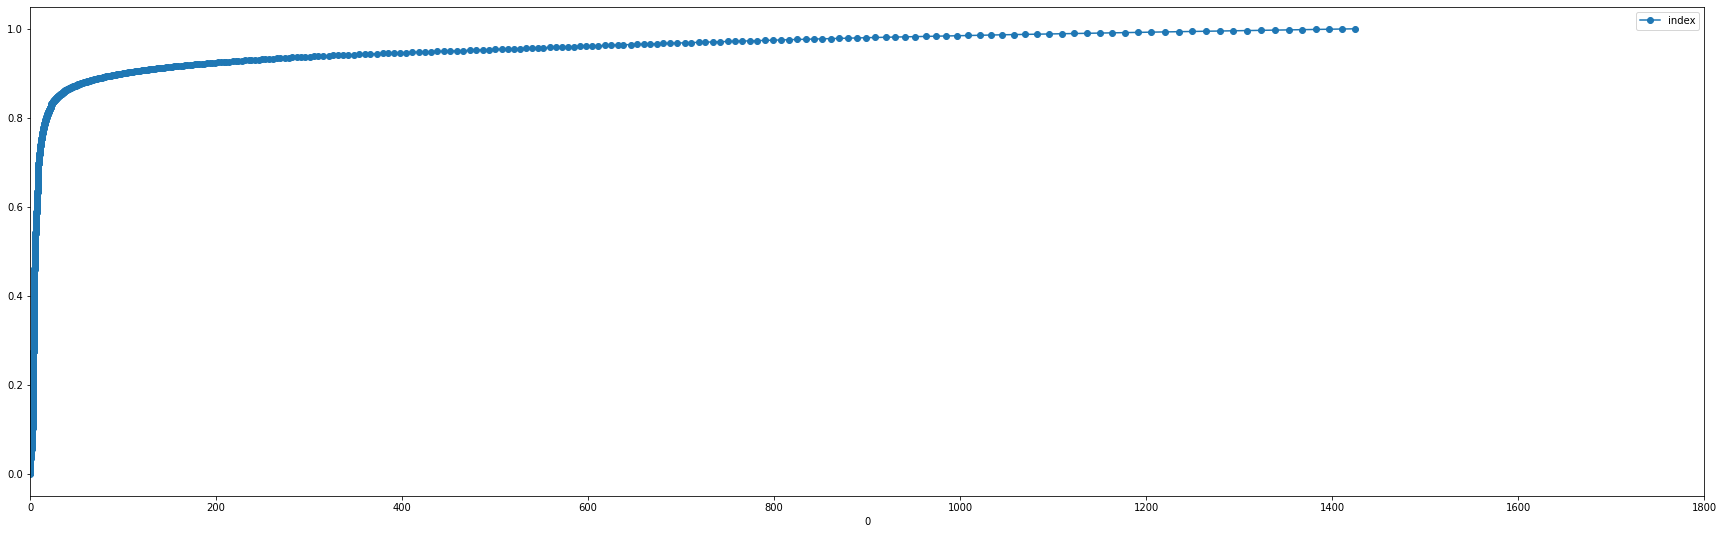

In [64]:
time_diff_all_users.plot(marker='o', figsize=(30,9), xlim=(0,1800))